In [5]:
# drive mount
! ls drive/MyDrive

'Colab Notebooks'   __init__.py   __pycache__
 evaluation.py	    plant-data	  yield_gen.py


In [6]:
# importing pipelines 
from drive.MyDrive.yield_gen import * 
from drive.MyDrive.evaluation import * 

In [7]:
docs()



    * functions
        - generator() : arguments gen_type = ( with-aug | with-augmentation ) & host = ( local | colab )

    * usage 
    
        from yield_gen import * 
        train, valid, test = generator(gen_type="with-aug", host="colab") # returns a tf.generator object with data

    * requirements
    
        - local data directory structure
            ./plant-data
                /Train
                    /Train
                        ..samples
                /Test
                    /Test
                        ..samples 
                /Validation
                    /Validation
                        ..samples
        
        - Colab data directory structure 
            ./drive
                ./MyDrive
                    /plant-data
                        /Train
                            /Train
                                ..samples
                        /Test
                            /Test
                                ..samples 
             

In [8]:
# yield generators 

a_train, a_valid, a_test = generator(gen_type="with-aug", host="colab")

Colab Paths Returned
Found 1322 images belonging to 3 classes.
Found 105 images belonging to 3 classes.
Found 105 images belonging to 3 classes.


## InceptionV3

In [9]:
from tensorflow.keras.applications import InceptionV3

In [10]:
a_train.image_shape

(256, 256, 3)

In [11]:
inception = InceptionV3(include_top=False, weights='imagenet', input_shape=a_train.image_shape)

87916544/87910968 [==============================] - 0s 0us/step


In [12]:
# Freezing the Weights
for layer in inception.layers:
    layer.trainable = False

In [13]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [19]:
# Tensorflow
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
# Custom Output
model = Sequential()
model.add(inception)
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='softmax'))


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               18874624  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 40,694,051
Trainable params: 18,891,267
Non-trainable params: 21,802,784
_________________________________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#callbacks 
early_stop = EarlyStopping(monitor = 'val_accuracy', patience=3)

In [21]:
import time

start = time.perf_counter()

perf = model.fit_generator(a_train, epochs=15, callbacks=[early_stop],validation_data=a_valid)

elapsed = time.perf_counter()- start 

print('Elapsed {}'.format(elapsed/60))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
42/42 [==============================] - 682s 15s/step - loss: 4.6588 - accuracy: 0.6876 - val_loss: 0.4984 - val_accuracy: 0.8095
Epoch 2/15
42/42 [==============================] - 191s 5s/step - loss: 0.4029 - accuracy: 0.8351 - val_loss: 0.3140 - val_accuracy: 0.8571
Epoch 3/15
42/42 [==============================] - 191s 5s/step - loss: 0.3955 - accuracy: 0.8631 - val_loss: 0.3282 - val_accuracy: 0.8857
Epoch 4/15
42/42 [==============================] - 192s 5s/step - loss: 0.2759 - accuracy: 0.9002 - val_loss: 0.2753 - val_accuracy: 0.9048
Epoch 5/15
42/42 [==============================] - 191s 5s/step - loss: 0.2746 - accuracy: 0.9009 - val_loss: 0.2126 - val_accuracy: 0.9238
Epoch 6/15
42/42 [==============================] - 191s 5s/step - loss: 0.2040 - accuracy: 0.9123 - val_loss: 0.3900 - val_accuracy: 0.8667
Epoch 7/15
42/42 [==============================] - 192s 5s/step - loss: 0.2052 - accuracy: 0.9289 - val_loss: 0.3098 - val_accuracy: 0.9238
Epoch 8/15
4

In [22]:
model.save("InceptionV3.h5")

In [23]:
import pandas as pd 
histdata = pd.DataFrame(perf.history)

In [24]:
histdata

,loss,accuracy,val_loss,val_accuracy
0,4.658825,0.687595,0.498422,0.809524
1,0.402866,0.835098,0.313984,0.857143
2,0.395481,0.863086,0.328223,0.885714
3,0.275946,0.900151,0.275312,0.904762
4,0.274624,0.900908,0.212644,0.923810
5,0.203983,0.912254,0.389955,0.866667
6,0.205152,0.928896,0.309781,0.923810
7,0.144010,0.946293,0.287602,0.933333
8,0.160829,0.943268,0.218820,0.933333
9,0.146650,0.950076,0.328898,0.942857


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation Accuracy - 93.33%
validation loss - 0.24
Test Accuracy - 97.14%
Test loss - 0.10
preserving records
InceptionV3 Records Created


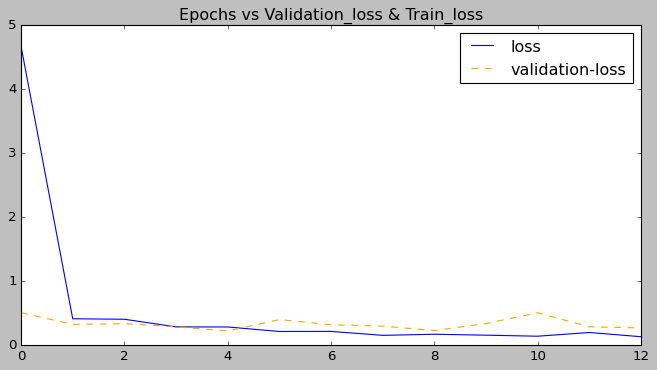

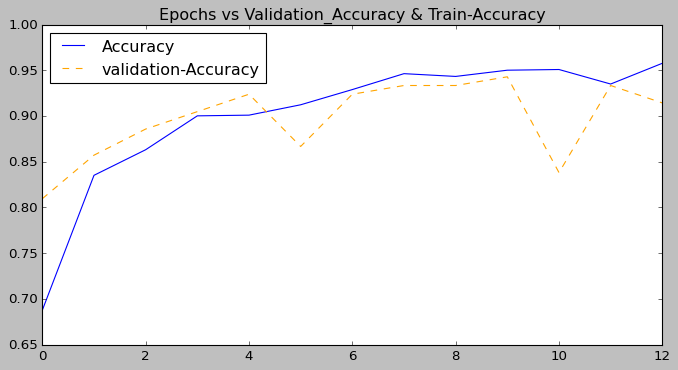

In [25]:
evaluate_model("InceptionV3", model, a_valid, a_test, histdata, elapsed)